In [34]:
#load csv in pandas

import pandas as pd

df = pd.read_csv('airbnb.csv')

In [35]:
#delete columns amenities and amenities_list
df.drop(['amenities', 'amenities_list'], axis=1, inplace=True)

In [36]:
#save to csv
df.to_csv('airbnb_clean22.csv', index=False)

In [37]:
airbnb_df = pd.read_csv('airbnb_clean22.csv')  # Assuming tab delimiter as per the user's output format
yelp_df = pd.read_csv('yelp_final.csv')  # Assuming tab delimiter

# length of airbnb_df
print(len(airbnb_df))

6088


# price(airbnb) vs avg rating(rest)



In [38]:
import numpy as np

# Haversine formula to calculate great-circle distance between two coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# For each Airbnb listing, find restaurants within 2 km
airbnb_restaurant_map = {}

for _, airbnb in airbnb_df.iterrows():
    listing_id = airbnb["id"]
    lat_airbnb, lon_airbnb = airbnb["latitude"], airbnb["longitude"]
    
    # Find restaurants within 2 km
    nearby_restaurants = yelp_df[
        haversine(lat_airbnb, lon_airbnb, yelp_df["latitude"], yelp_df["longitude"]) <= 1
    ]
    
    airbnb_restaurant_map[listing_id] = nearby_restaurants




In [39]:
aggregated_data = []

for listing_id, nearby_restaurants in airbnb_restaurant_map.items():
    if len(nearby_restaurants) > 0:
        avg_rating = nearby_restaurants["stars"].mean()
        weighted_avg_rating = np.average(nearby_restaurants["stars"], weights=nearby_restaurants["review_count"])
        restaurant_count = len(nearby_restaurants)
    else:
        avg_rating = None
        weighted_avg_rating = None
        restaurant_count = 0
    
    aggregated_data.append({
        "id": listing_id,
        "avg_rating_nearby": avg_rating,
        "weighted_avg_rating_nearby": weighted_avg_rating,
        "restaurant_count_1km": restaurant_count
    })

# Convert aggregated data into a DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Merge with Airbnb dataset
airbnb_merged = pd.merge(airbnb_df, aggregated_df, on="id", how="left")


# Drop NaN values for correlation and regression analysis
clean_data = airbnb_merged.dropna(subset=['price', 'avg_rating_nearby'])


In [40]:
#count rows of clean_data

clean_data = clean_data.dropna()
print(len(clean_data))

4518


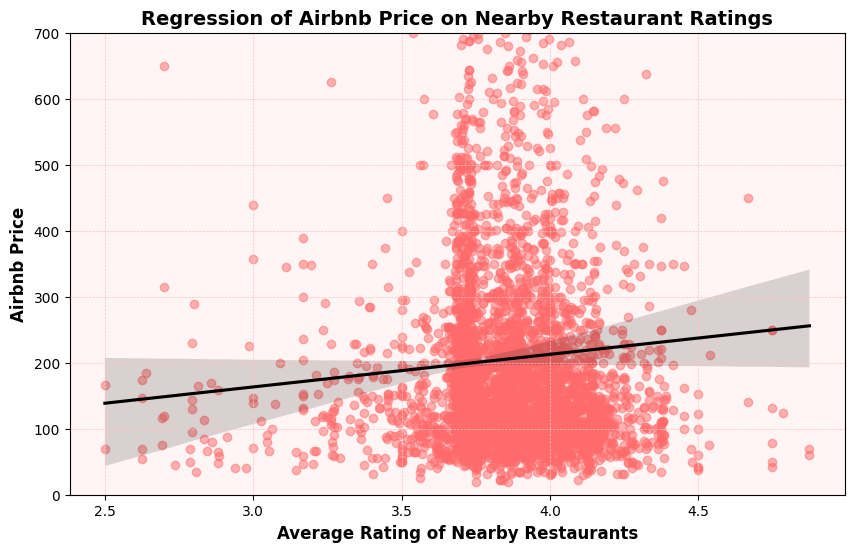

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Modify the scatter plot with regression line to match the color scheme
plt.figure(figsize=(10, 6))

# Use colors inspired by the screenshot (red-pink tones)
sns.regplot(
    x=clean_data['avg_rating_nearby'], 
    y=clean_data['price'], 
    scatter_kws={'alpha': 0.5, 'color': '#FF6B6B'},  # Light red scatter points
    line_kws={'color': 'black'}  # Darker red regression line
)

# Set y-axis limits
plt.ylim(0, 700)

# Modify labels and title to fit theme
plt.xlabel('Average Rating of Nearby Restaurants', fontsize=12,  fontweight='bold')
plt.ylabel('Airbnb Price', fontsize=12, fontweight='bold')
plt.title('Regression of Airbnb Price on Nearby Restaurant Ratings', fontsize=14,  fontweight='bold')

# Change background and grid color to fit theme
plt.gca().set_facecolor('#FFF5F5')  # Light pink background
plt.grid(color='#FFC1C1', linestyle='--', linewidth=0.5)  # Soft pink grid lines

# Show the updated plot
plt.show()


In [41]:
clean_data.head(20)
# print only columne price and avg_rating_nearby
#(clean_data[['price', 'avg_rating_nearby']]).head(20)

,id,name,latitude,longitude,price,neighbourhood_cleansed,host_id,host_name,host_response_rate,host_acceptance_rate,...,review_scores_rating,wifi_dummy,air_conditioning_dummy,parking_dummy,room_type_Hotel room,room_type_Private room,room_type_Shared room,avg_rating_nearby,weighted_avg_rating_nearby,restaurant_count_1km
1,629625810592855899,Modern Fresh Clean Historic Home!,29.935450,-90.091230,98,Central City,278688053,Nola,100%,99%,...,4.34,1,1,0,False,False,False,3.935185,3.710030,54
4,1025530407732903532,Constance Lofts by Black Swan - Spacious Loft,29.941560,-90.069660,117,Lower Garden District,541716509,Black,100%,100%,...,4.57,1,1,0,False,False,False,3.777620,3.913362,353
5,800218158714820732,Luxurious Treme Tower - Sleeps 14; Near French...,29.967172,-90.078441,486,Treme - Lafitte,47269321,Dynasty Property Group,100%,100%,...,4.58,1,0,0,False,False,False,4.057971,4.265656,69
6,1218307190815146231,Rare Find! 2BR/2BA Steps from Superdome & Para...,29.944300,-90.073160,193,Central Business District,545764469,Myra,100%,99%,...,5.00,1,1,0,False,False,False,3.773523,3.946743,457
9,580288108865579480,Boutique Room Next to City Park,29.977870,-90.102960,61,Mid-City,442922842,Canal Express Studios,100%,99%,...,4.52,1,1,0,False,True,False,3.627119,3.909440,118
12,240258,Maison Marais 2,29.968420,-90.052130,79,Marigny,391462,Georgia,100%,98%,...,4.90,1,1,0,False,False,False,3.979381,4.011347,194
20,34595953,Exclusive Gem | Greenway & Streetcar Nearby,29.978254,-90.098106,253,Mid-City,261001308,Great NOLA,100%,100%,...,4.77,1,0,0,False,False,False,3.584071,3.949549,113
21,860214365095651024,Audubon House Apt.1: 2bd/1ba,29.935300,-90.134080,80,Black Pearl,498930316,Raymond,100%,100%,...,5.00,1,1,0,False,False,False,3.730159,3.866207,63
23,31026414,Mid City Studio Apartment,29.967870,-90.093000,45,Mid-City,26598201,Freddy,100%,100%,...,4.64,1,1,0,False,False,False,3.875000,4.136080,92
25,48394954,Historic Home 2 blocks from Canal Streetcar,29.971420,-90.101100,80,Mid-City,20732873,Whitley,100%,100%,...,4.93,1,0,0,False,False,False,3.716102,3.904645,118


In [57]:


# Linear Regression: Predicting Airbnb price from restaurant ratings
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# X = sm.add_constant(clean_data['avg_rating_nearby'])  # Add constant for intercept
# y = clean_data['price']

model = smf.ols(formula='price ~ avg_rating_nearby', data=clean_data).fit()



# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.755
Date:                Sat, 15 Mar 2025   Prob (F-statistic):             0.0293
Time:                        16:56:41   Log-Likelihood:                -32809.
No. Observations:                4518   AIC:                         6.562e+04
Df Residuals:                    4516   BIC:                         6.563e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            15.1715     87.47

In [43]:
model3 = smf.ols(formula='price ~ restaurant_count_1km ', data=clean_data).fit()



# Print regression results
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.190
Date:                Sat, 15 Mar 2025   Prob (F-statistic):            0.00245
Time:                        16:50:45   Log-Likelihood:                -32807.
No. Observations:                4518   AIC:                         6.562e+04
Df Residuals:                    4516   BIC:                         6.563e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              190.2850 

# conlusion 1
# airbnb price is positively to the avg rating of the restaurant, overall

control

In [44]:
print(clean_data.columns)
# count rows
print(len(clean_data))

Index(['id', 'name', 'latitude', 'longitude', 'price',
       'neighbourhood_cleansed', 'host_id', 'host_name', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_total_listings_count', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'number_of_reviews', 'review_scores_rating',
       'wifi_dummy', 'air_conditioning_dummy', 'parking_dummy',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'avg_rating_nearby',
       'weighted_avg_rating_nearby', 'restaurant_count_1km'],
      dtype='object')
4518


In [45]:
# show all column names

# do a mutiple regreesion, regrees prive with accommodates, bedrooms, bathrooms, bedrooms, wifi_dummy', 'air_conditioning_dummy', 'parking_dummy','room_type_Hotel room', 'room_type_Private room','room_type_Shared room'

model = smf.ols(formula='price ~ accommodates + bathrooms + bedrooms ', data=clean_data).fit()

# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sat, 15 Mar 2025   Prob (F-statistic):          1.33e-132
Time:                        16:50:45   Log-Likelihood:                -32504.
No. Observations:                4518   AIC:                         6.502e+04
Df Residuals:                    4514   BIC:                         6.504e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.2552      9.631     -0.442   

In [46]:
# Define selected features
control_variables = ['accommodates', 'bedrooms', 'bathrooms']
all_variables = ' + '.join(control_variables) + ' + restaurant_count_1km'

# Fill missing values with median for numerical columns
for col in control_variables + ['restaurant_count_1km']:
    if col in clean_data.columns:
        clean_data[col] = clean_data[col].fillna(clean_data[col].median())

# Fit the regression model with restaurant_count_1km as the main predictor while controlling for other variables
model = smf.ols(formula=f'price ~ {all_variables}', data=clean_data).fit()

# Display the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     165.7
Date:                Sat, 15 Mar 2025   Prob (F-statistic):          1.44e-132
Time:                        16:50:45   Log-Likelihood:                -32502.
No. Observations:                4518   AIC:                         6.501e+04
Df Residuals:                    4513   BIC:                         6.505e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -14.2093 

# conlusion 2 controled, the price of airbnb is positively to number of restaurant, overall

In [47]:
# Define selected features
control_variables = ['accommodates', 'bedrooms', 'bathrooms']
all_variables2 = ' + '.join(control_variables) + ' + avg_rating_nearby'

# Fill missing values with median for numerical columns
for col in control_variables + ['avg_rating_nearby']:
    if col in clean_data.columns:
        clean_data[col] = clean_data[col].fillna(clean_data[col].median())

# Fit the regression model with restaurant_count_1km as the main predictor while controlling for other variables
model2 = smf.ols(formula=f'price ~ {all_variables2}', data=clean_data).fit()

# Display the regression summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     166.6
Date:                Sat, 15 Mar 2025   Prob (F-statistic):          2.91e-133
Time:                        16:50:45   Log-Likelihood:                -32500.
No. Observations:                4518   AIC:                         6.501e+04
Df Residuals:                    4513   BIC:                         6.504e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -245.8366     82.79

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
#print(clean_data.columns)  # Ensure 'avg_rating_nearby' is in the dataset
#print(aggregated_df.columns)


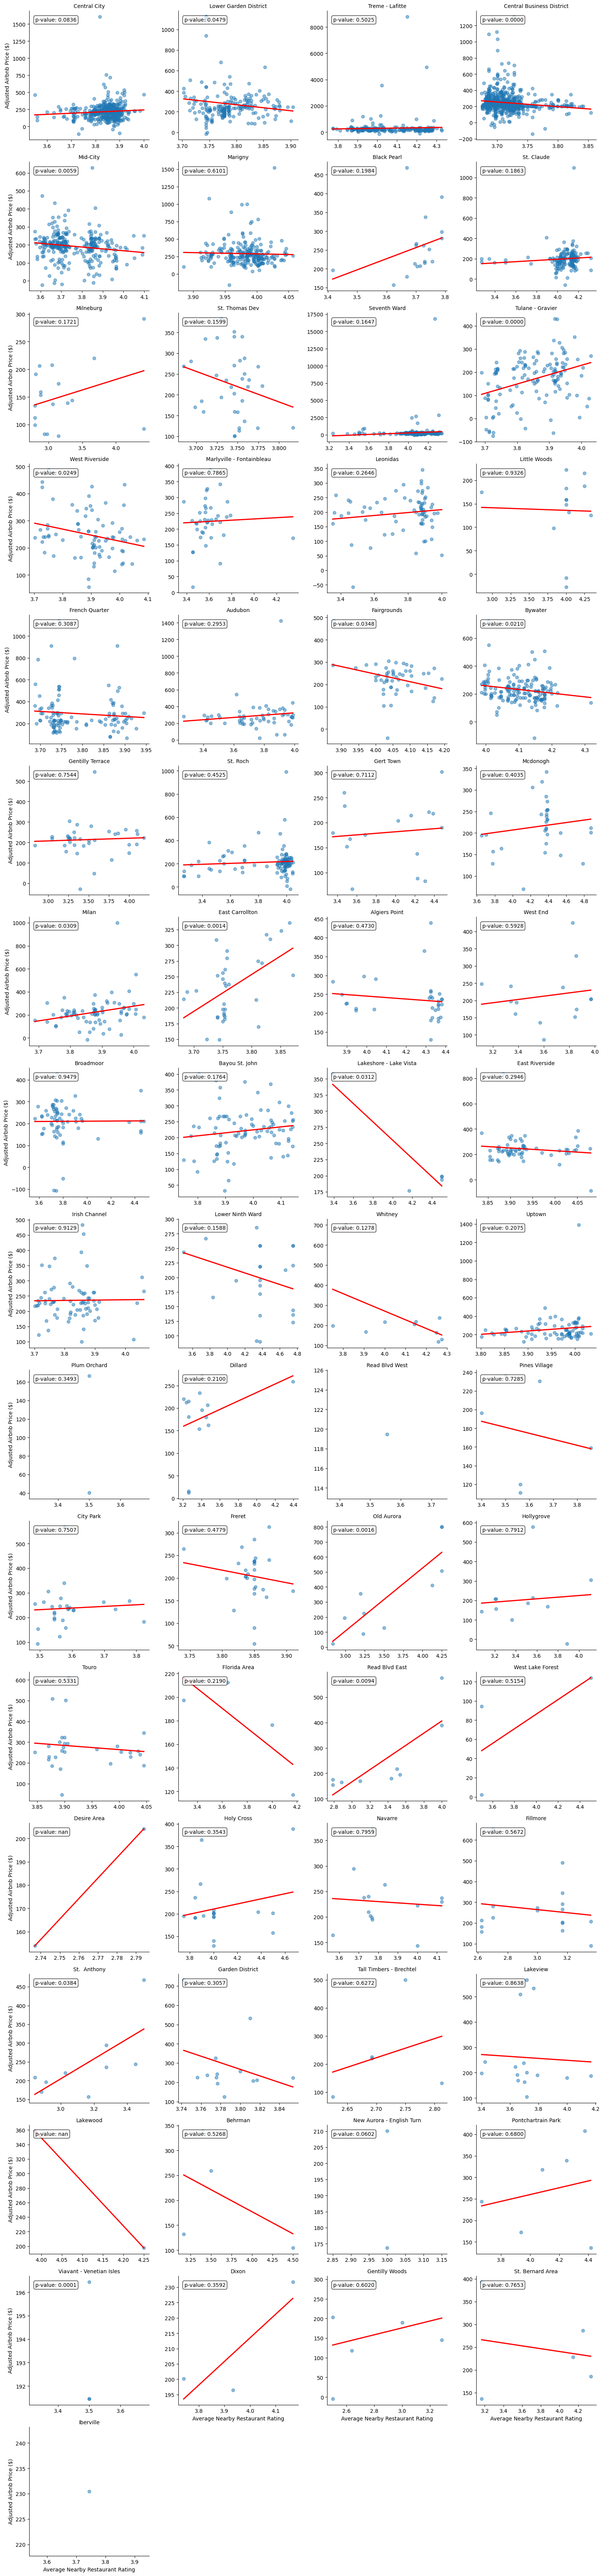

In [74]:
# Compute residuals by removing the effect of control variables
clean_data['price_resid'] = model2.resid + model2.params['avg_rating_nearby'] * clean_data['avg_rating_nearby']

# Facet Grid: Adjusted Restaurant Ratings vs Airbnb Prices in Each Neighborhood
g = sns.FacetGrid(clean_data, col="neighbourhood_cleansed", col_wrap=4, height=4, sharex=False, sharey=False)

# Use sns.regplot() to plot the adjusted relationship
g.map(sns.regplot, "avg_rating_nearby", "price_resid", scatter_kws={'alpha':0.5}, line_kws={"color": "red"}, ci=None)

def add_p_value(ax, p_value):
    ax.text(0.05, 0.95, f"p-value: {p_value:.4f}", transform=ax.transAxes,
            fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add p-values to each subplot
for ax, neighbourhood in zip(g.axes.flat, clean_data["neighbourhood_cleansed"].unique()):
    subset = clean_data[clean_data["neighbourhood_cleansed"] == neighbourhood]
    if len(subset) > 1:
        model_subset = smf.ols(formula=f'price_resid ~ avg_rating_nearby', data=subset).fit()
        add_p_value(ax, model_subset.pvalues["avg_rating_nearby"])

g.set_axis_labels("Average Nearby Restaurant Rating", "Adjusted Airbnb Price ($)")
g.set_titles(col_template="{col_name}")

plt.show()


In [95]:
# Identify neighborhoods with significant positive relationships
significant_neighborhoods = []

# Loop through each neighborhood and perform regression
for neighbourhood in clean_data["neighbourhood_cleansed"].unique():
    subset = clean_data[clean_data["neighbourhood_cleansed"] == neighbourhood]
    if len(subset) > 1:
        model_subset = smf.ols(formula='price_resid ~ restaurant_count_1km', data=subset).fit()
        p_value = model_subset.pvalues["restaurant_count_1km"]
        coefficient = model_subset.params["restaurant_count_1km"]
        
        # Check if p-value < 0.05 and coefficient is positive
        if p_value < 0.05 and coefficient > 0:
            significant_neighborhoods.append((neighbourhood, p_value, coefficient))

# Convert results to DataFrame
significant_df = pd.DataFrame(significant_neighborhoods, columns=["Neighborhood", "p-value", "Coefficient"])

print(significant_df)

             Neighborhood   p-value  Coefficient
0   Lower Garden District  0.000016     0.528022
1                Mid-City  0.022820     0.451524
2             Black Pearl  0.016683     1.462592
3        Tulane - Gravier  0.011454     1.050146
4                Leonidas  0.004501     0.626330
5                 Bywater  0.007786     0.339852
6                   Milan  0.034635     1.213424
7  Lakeshore - Lake Vista  0.003215     6.376653
8          East Riverside  0.022899     1.755378


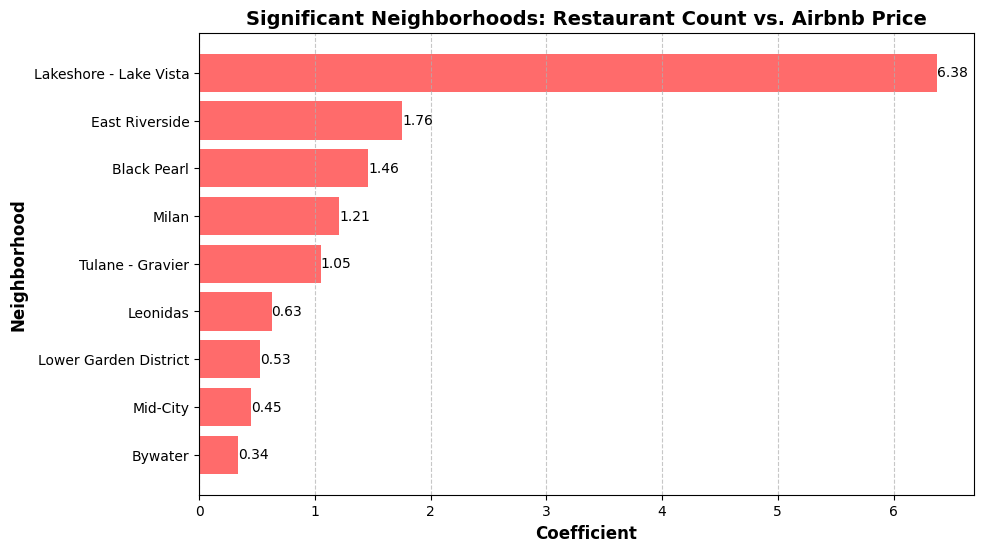

In [96]:
import matplotlib.pyplot as plt

# Sort by coefficient for better visualization
significant_df = significant_df.sort_values(by="Coefficient", ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(significant_df["Neighborhood"], significant_df["Coefficient"], color="#FF6B6B")

# Labels and title
plt.xlabel("Coefficient", fontsize=12, fontweight='bold')
plt.ylabel("Neighborhood", fontsize=12, fontweight='bold')
plt.title("Significant Neighborhoods: Restaurant Count vs. Airbnb Price", fontsize=14, fontweight='bold')

# Show values on bars
for index, value in enumerate(significant_df["Coefficient"]):
    plt.text(value, index, f"{value:.2f}", va='center', fontsize=10)

# Show the chart
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add grid for clarity
plt.show()

# EDA

KeyboardInterrupt: 

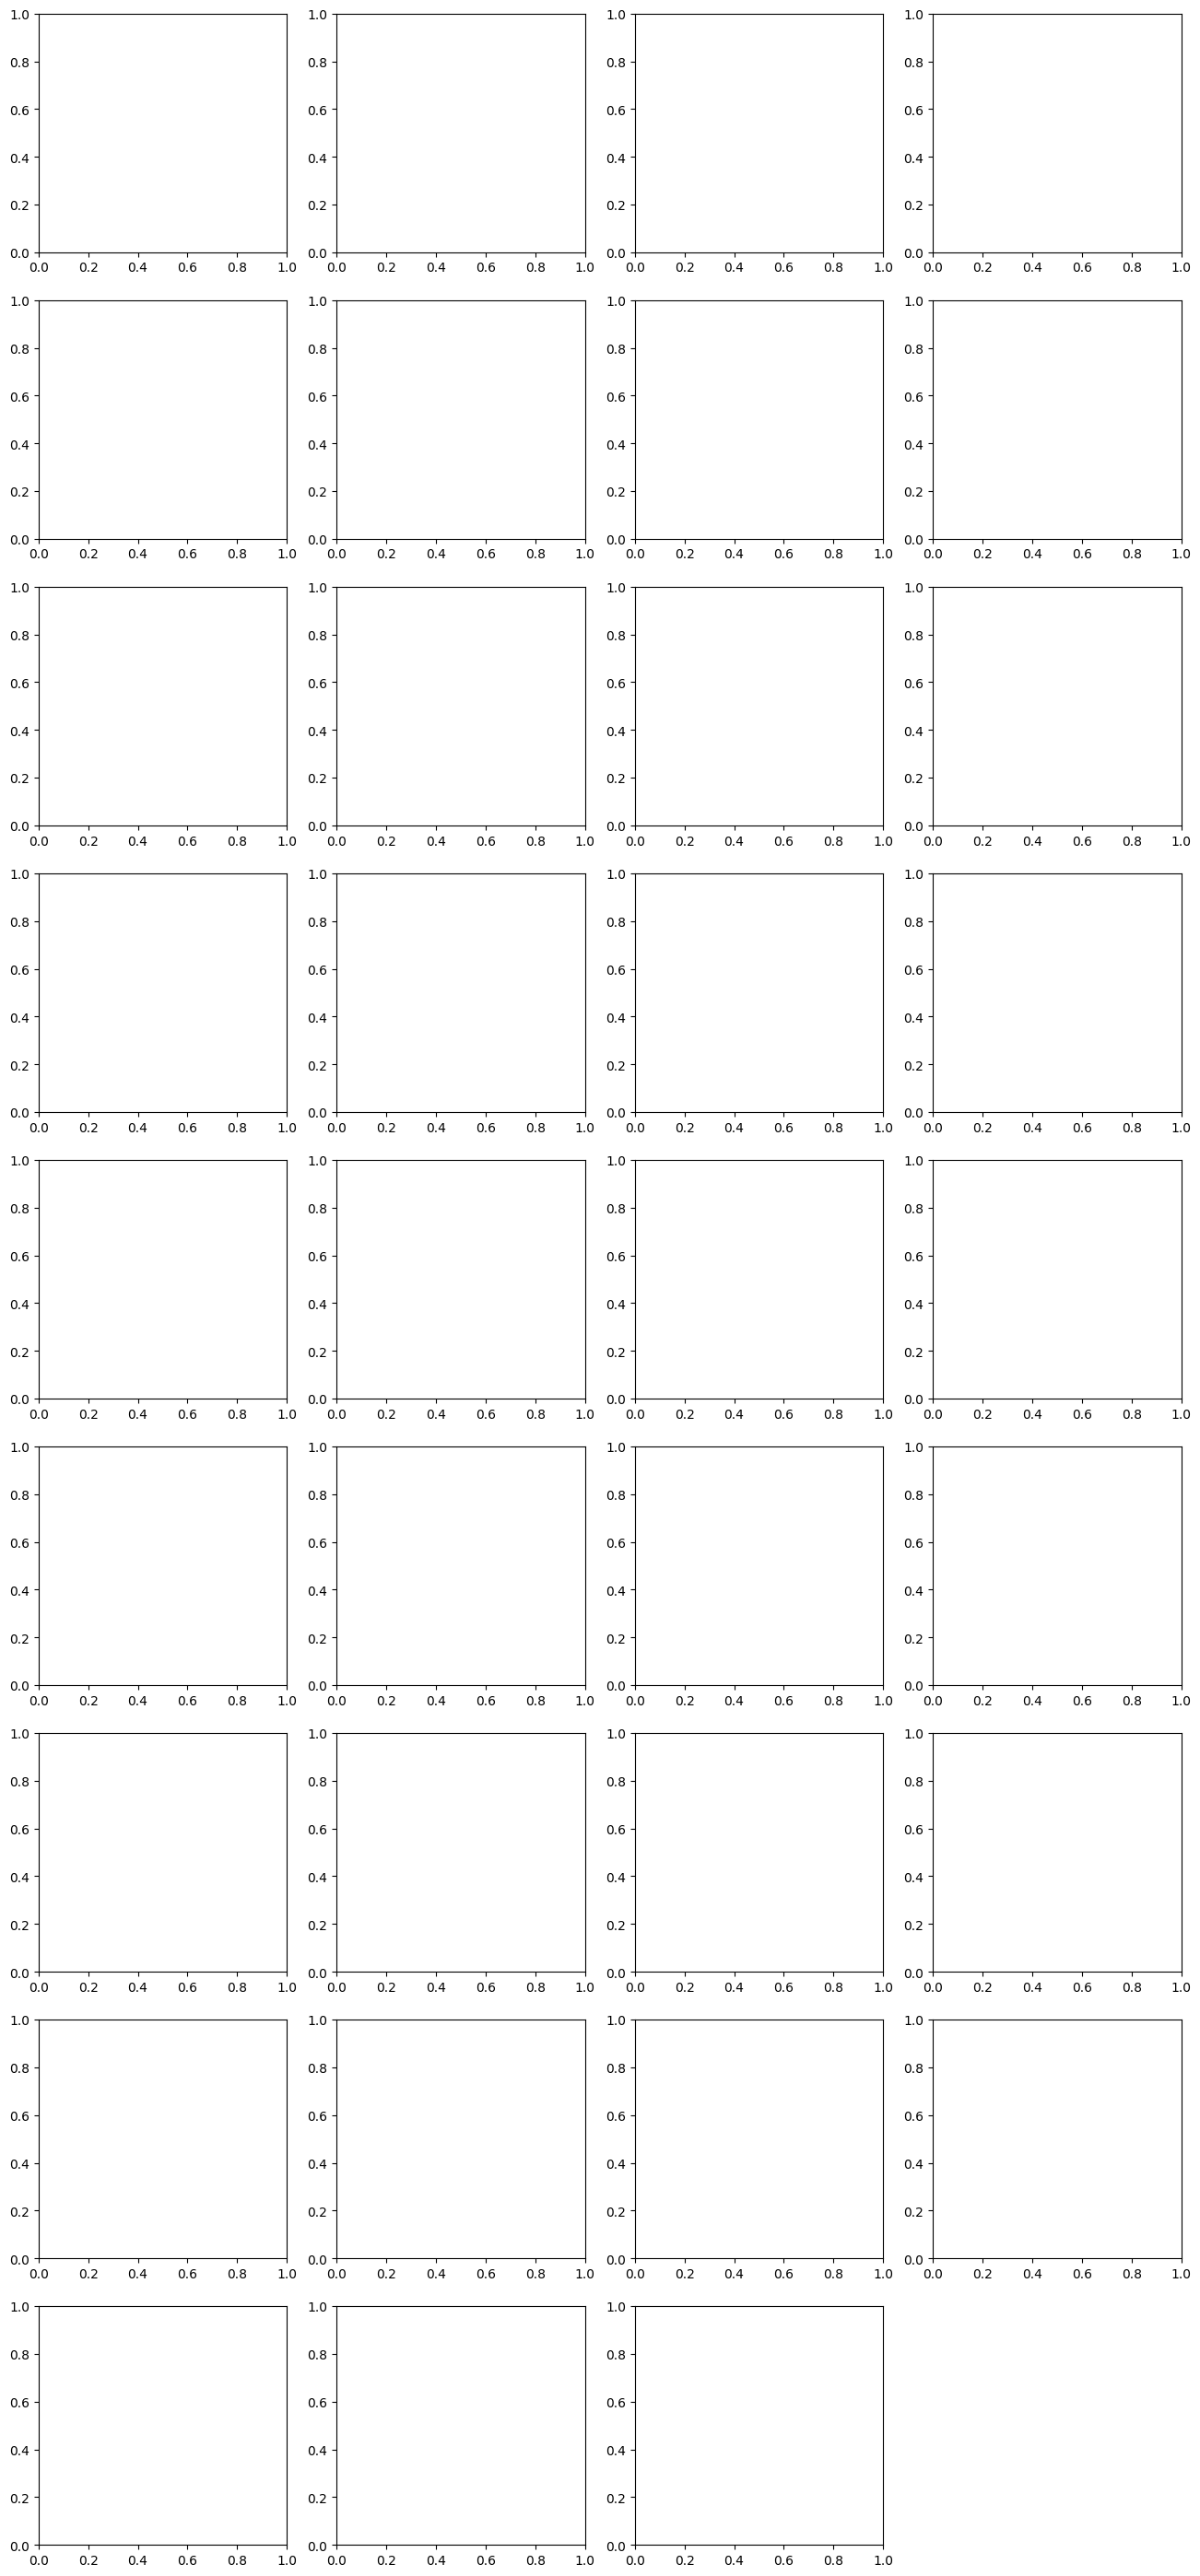

In [93]:
# Compute residuals by removing the effect of control variables
clean_data['price_resid'] = model.resid + model.params['restaurant_count_1km'] * clean_data['restaurant_count_1km']

# Facet Grid: Adjusted Restaurant Ratings vs Airbnb Prices in Each Neighborhood
g = sns.FacetGrid(clean_data, col="neighbourhood_cleansed", col_wrap=4, height=4, sharex=False, sharey=False)

# Use sns.regplot() to plot the adjusted relationship
g.map(sns.regplot, "restaurant_count_1km", "price_resid", scatter_kws={'alpha':0.5}, line_kws={"color": "red"}, ci=None)

def add_p_value(ax, p_value):
    ax.text(0.05, 0.95, f"p-value: {p_value:.4f}", transform=ax.transAxes,
            fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add p-values to each subplot
for ax, neighbourhood in zip(g.axes.flat, clean_data["neighbourhood_cleansed"].unique()):
    subset = clean_data[clean_data["neighbourhood_cleansed"] == neighbourhood]
    if len(subset) > 1:
        model_subset = smf.ols(formula=f'price_resid ~ restaurant_count_1km', data=subset).fit()
        add_p_value(ax, model_subset.pvalues["restaurant_count_1km"])

g.set_axis_labels("restaurant_count_1km", "Adjusted Airbnb Price ($)")
g.set_titles(col_template="{col_name}")

plt.show()


                            OLS Regression Results                            
Dep. Variable:            price_resid   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     4.324
Date:                Sat, 15 Mar 2025   Prob (F-statistic):             0.0413
Time:                        17:42:49   Log-Likelihood:                -444.37
No. Observations:                  71   AIC:                             892.7
Df Residuals:                      69   BIC:                             897.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              118.6273 

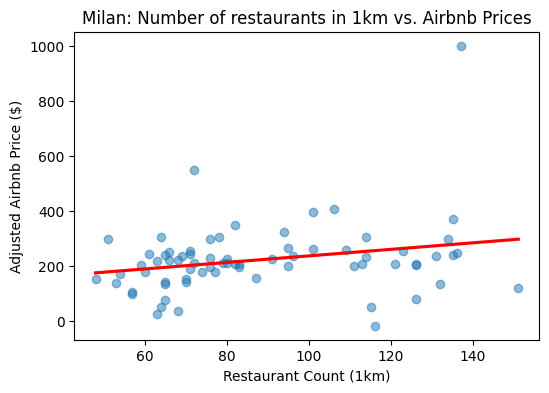

In [87]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for the Leonidas neighborhood
Milan_data = clean_data[clean_data["neighbourhood_cleansed"] == "Milan"]

# Run the regression for Leonidas
if len(Milan_data) > 1:
    model_Milan = smf.ols(formula='price_resid ~ restaurant_count_1km', data=Milan_data).fit()
    print(model_Milan.summary())  # Print regression summary

    # Plot the regression
    plt.figure(figsize=(6, 4))
    sns.regplot(data=Milan_data, x="restaurant_count_1km", y="price_resid", scatter_kws={'alpha': 0.5}, line_kws={"color": "red"}, ci=None)
    plt.xlabel("Restaurant Count (1km)")
    plt.ylabel("Adjusted Airbnb Price ($)")
    plt.title("Milan: Number of restaurants in 1km vs. Airbnb Prices")
    plt.show()


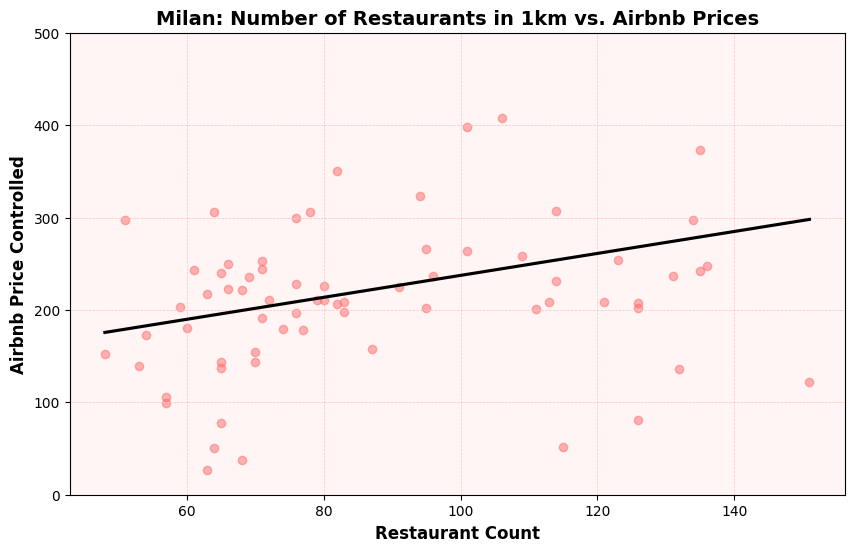

NameError: name 'model_milan' is not defined

In [81]:
# Filter data for the Leonidas neighborhood
# Modify the regression plot for Milan neighborhood to match the color scheme
plt.figure(figsize=(10, 6))

# Use colors inspired by the previous theme (red-pink tones)
sns.regplot(
    data=Milan, 
    x="restaurant_count_1km", 
    y="price_resid", 
    scatter_kws={'alpha': 0.5, 'color': '#FF6B6B'},  # Light red scatter points
    line_kws={"color": "black"},  # Black regression line
    ci=None
)

# Set y-axis limits for better visibility
plt.ylim(0, 500)

# Modify labels and title to fit the theme
plt.xlabel("Restaurant Count", fontsize=12, fontweight='bold')
plt.ylabel("Airbnb Price Controlled", fontsize=12, fontweight='bold')
plt.title("Milan: Number of Restaurants in 1km vs. Airbnb Prices", fontsize=14, fontweight='bold')

# Change background and grid color to fit the theme
plt.gca().set_facecolor('#FFF5F5')  # Light pink background
plt.grid(color='#FFC1C1', linestyle='--', linewidth=0.5)  # Soft pink grid lines

# Show the updated plot
plt.show()

# Print the regression summary for Milan neighborhood



                            OLS Regression Results                            
Dep. Variable:            price_resid   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.003329
Date:                Sat, 15 Mar 2025   Prob (F-statistic):              0.954
Time:                        17:44:23   Log-Likelihood:                -5230.2
No. Observations:                 853   AIC:                         1.046e+04
Df Residuals:                     851   BIC:                         1.047e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              243.3815 

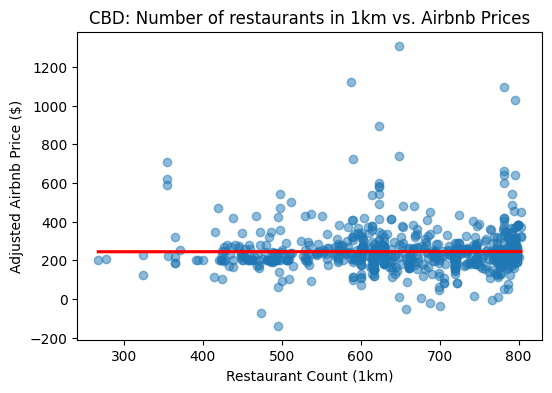

In [88]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for the Leonidas neighborhood
C_data = clean_data[clean_data["neighbourhood_cleansed"] == "Central Business District"]

# Run the regression for Leonidas
if len(C_data) > 1:
    model_C = smf.ols(formula='price_resid ~ restaurant_count_1km', data=C_data).fit()
    print(model_C.summary())  # Print regression summary

    # Plot the regression
    plt.figure(figsize=(6, 4))
    sns.regplot(data=C_data, x="restaurant_count_1km", y="price_resid", scatter_kws={'alpha': 0.5}, line_kws={"color": "red"}, ci=None)
    plt.xlabel("Restaurant Count (1km)")
    plt.ylabel("Adjusted Airbnb Price ($)")
    plt.title("CBD: Number of restaurants in 1km vs. Airbnb Prices")
    plt.show()

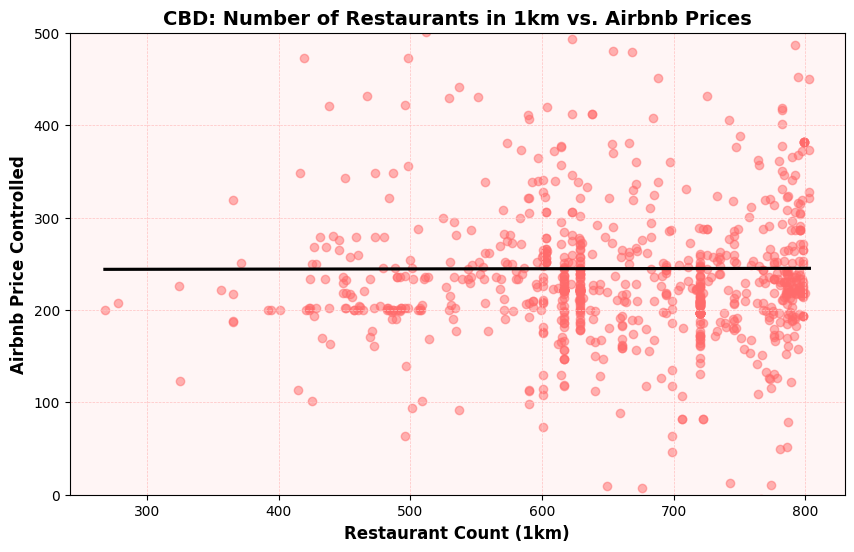

In [92]:
# Modify the regression plot for Central Business District (CBD) to match the Milan color scheme
plt.figure(figsize=(10, 6))

# Use colors inspired by the previous theme (red-pink tones)
sns.regplot(
    data=C_data, 
    x="restaurant_count_1km", 
    y="price_resid", 
    scatter_kws={'alpha': 0.5, 'color': '#FF6B6B'},  # Light red scatter points
    line_kws={"color": "black"},  # Black regression line
    ci=None
)

# Set y-axis limits for consistency
plt.ylim(0, 500)

# Modify labels and title to fit the theme
plt.xlabel("Restaurant Count (1km)", fontsize=12, fontweight='bold')
plt.ylabel("Airbnb Price Controlled", fontsize=12, fontweight='bold')
plt.title("CBD: Number of Restaurants in 1km vs. Airbnb Prices", fontsize=14, fontweight='bold')

# Change background and grid color to fit the theme
plt.gca().set_facecolor('#FFF5F5')  # Light pink background
plt.grid(color='#FFC1C1', linestyle='--', linewidth=0.5)  # Soft pink grid lines

# Show the updated plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:            price_resid   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.4713
Date:                Sat, 15 Mar 2025   Prob (F-statistic):              0.495
Time:                        17:18:26   Log-Likelihood:                -400.52
No. Observations:                  71   AIC:                             805.0
Df Residuals:                      69   BIC:                             809.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               39.3385 

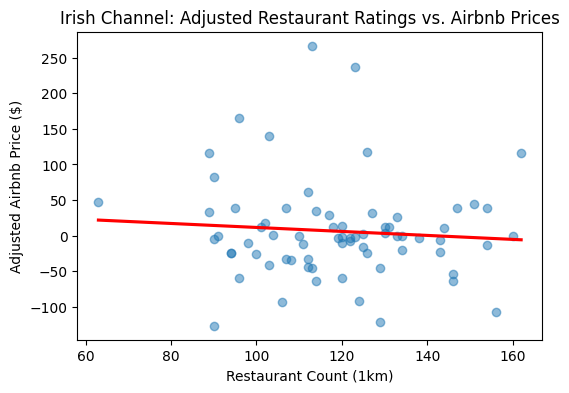

In [73]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for the Irish Channel neighborhood
irish_channel_data = clean_data[clean_data["neighbourhood_cleansed"] == "Irish Channel"]

# Run the regression for Irish Channel
if len(irish_channel_data) > 1:
    model_irish_channel = smf.ols(formula='price_resid ~ restaurant_count_1km', data=irish_channel_data).fit()
    print(model_irish_channel.summary())  # Print regression summary

    # Plot the regression
    plt.figure(figsize=(6, 4))
    sns.regplot(data=irish_channel_data, x="restaurant_count_1km", y="price_resid", scatter_kws={'alpha': 0.5}, line_kws={"color": "red"}, ci=None)
    plt.xlabel("Restaurant Count (1km)")
    plt.ylabel("Adjusted Airbnb Price ($)")
    plt.title("Irish Channel: Adjusted Restaurant Ratings vs. Airbnb Prices")
    plt.show()


In [67]:
model = smf.ols(formula='price_resid ~ avg_rating_nearby', data=clean_data).fit()



# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            price_resid   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.130
Date:                Sat, 15 Mar 2025   Prob (F-statistic):            0.00437
Time:                        17:11:02   Log-Likelihood:                -32500.
No. Observations:                4518   AIC:                         6.500e+04
Df Residuals:                    4516   BIC:                         6.502e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -220.9503     81.70

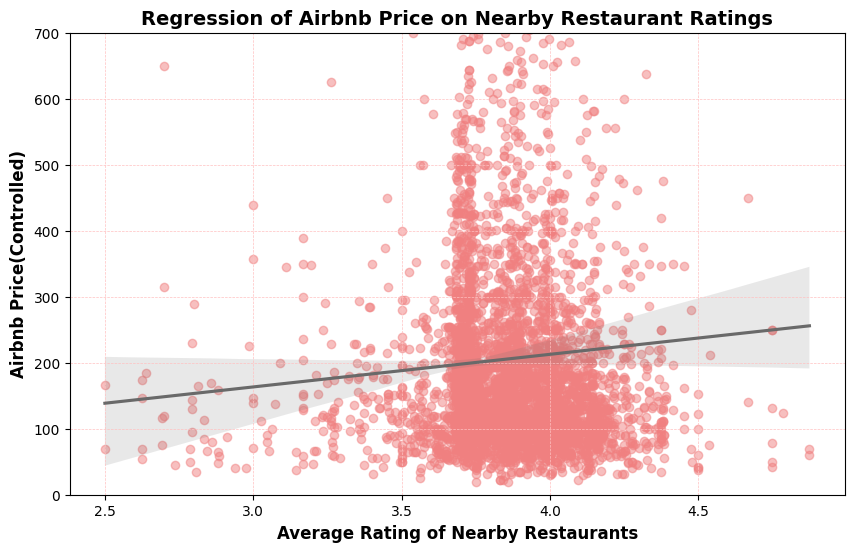

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Modify the scatter plot with regression line to match the color scheme
plt.figure(figsize=(10, 6))

# Use colors inspired by the screenshot (red-pink tones)
sns.regplot(
    x=clean_data['avg_rating_nearby'], 
    y=clean_data['price'], 
    #scatter_kws={'alpha': 0.5, 'color': '#FF6B6B'},  # Light red scatter points
    scatter_kws={'alpha': 0.5, 'color': 'lightcoral'},
    line_kws={'color': 'dimgrey'}  # Darker red regression line
)

# Set y-axis limits
plt.ylim(0, 700)

# Modify labels and title to fit theme
plt.xlabel('Average Rating of Nearby Restaurants', fontsize=12,  fontweight='bold')
plt.ylabel('Airbnb Price(Controlled)', fontsize=12, fontweight='bold')
plt.title('Regression of Airbnb Price on Nearby Restaurant Ratings', fontsize=14,  fontweight='bold')

# Change background and grid color to fit theme
plt.gca().set_facecolor('white')  # Light pink background
plt.grid(color='#FFC1C1', linestyle='--', linewidth=0.5)  # Soft pink grid lines

# Show the updated plot
plt.show()

In [70]:
model = smf.ols(formula='price_resid ~ restaurant_count_1km', data=clean_data).fit()



# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            price_resid   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.055
Date:                Sat, 15 Mar 2025   Prob (F-statistic):             0.0139
Time:                        17:14:14   Log-Likelihood:                -32502.
No. Observations:                4518   AIC:                         6.501e+04
Df Residuals:                    4516   BIC:                         6.502e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.873e-12 

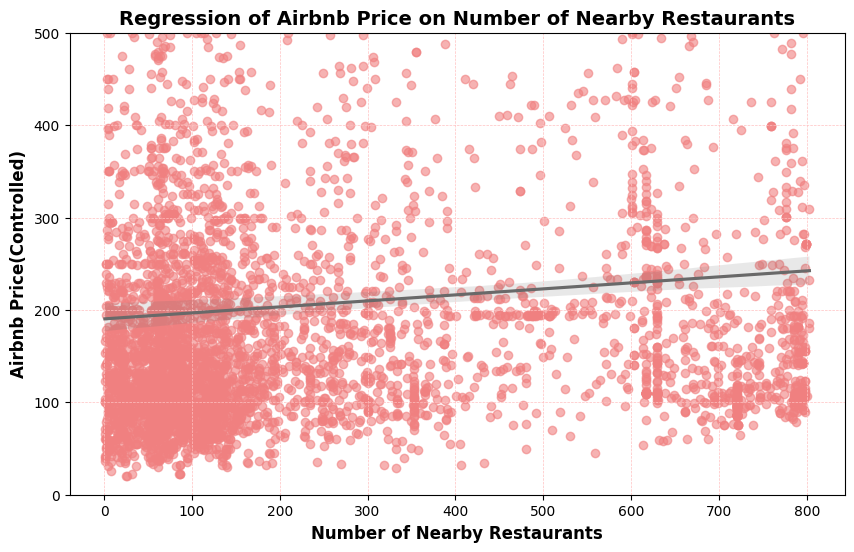

In [112]:
plt.figure(figsize=(10, 6))

# Use colors inspired by the screenshot (red-pink tones)
sns.regplot(
    x=clean_data['restaurant_count_1km'], 
    y=clean_data['price'], 
    scatter_kws={'alpha': 0.6, 'color': 'lightcoral'},  # Light red scatter points
    line_kws={'color': 'dimgrey'}  # Darker red regression line
)

# Set y-axis limits
plt.ylim(0, 500)

# Modify labels and title to fit theme
plt.xlabel('Number of Nearby Restaurants', fontsize=12,  fontweight='bold')
plt.ylabel('Airbnb Price(Controlled)', fontsize=12, fontweight='bold')
plt.title('Regression of Airbnb Price on Number of Nearby Restaurants', fontsize=14,  fontweight='bold')

# Change background and grid color to fit theme
plt.gca().set_facecolor('white')  # Light pink background
plt.grid(color='#FFC1C1', linestyle='--', linewidth=0.5)  # Soft pink grid lines

# Show the updated plot
plt.show()